<table>
  <tr>
    <td style="width: 60%; vertical-align: top; font-size: 14px; line-height: 1.6;">
      <h2 style="margin-top: 0;">Cybersecurity Threats Analysis 2015–2024</h2>
      <p><strong>Goal:</strong> Identify key trends, risks, and patterns in global cyberattacks from 2015 to 2024.</p>
      <p><strong>Main questions:</strong></p>
      <ul>
        <li>Which attack types are increasing over time?</li>
        <li>Which industries lose the most money?</li>
        <li>What sources are behind the attacks?</li>
        <li>Which defense methods reduce resolution time?</li>
        <li>Which countries are most frequently linked to cyberattacks?
      </ul>
      <p><strong>Attack Type Overview:</strong></p>
      <ul>
        <li><strong>Phishing:</strong> Deceptive emails trick users into revealing credentials.</li>
        <li><strong>Ransomware:</strong> Encrypts systems and demands payment for restoration.</li>
        <li><strong>DDoS:</strong> Overloads systems with traffic, causing service outages.</li>
        <li><strong>Man-in-the-Middle:</strong> Intercepts communication between users and systems.</li>
        <li><strong>Credential Stuffing:</strong> Reuses leaked passwords to access accounts.</li>
        <li><strong>Insider Threat:</strong> Employees or contractors misuse access.</li>
      </ul>
    </td>
    <td style="width: 70%; text-align: right;">
      <img src="cyber_threats_intro.png" width="1800">
    </td>
  </tr>
</table>


### Each row represents a single attack event.

* Country: the country where the incident occurred

* Year: the year when the attack took place

* Attack Type: the method used by the attackers, such as phishing, ransomware, or DDoS

* Target Industry: the sector targeted, including healthcare, banking, government, and others 

* Financial Loss (in Million $): the estimated financial damage caused by the attack

* Number of Affected Users: the number of individuals or user accounts impacted

* Attack Source: the origin of the attack, such as nation-state, hacker group, insider, or unknown

* Security Vulnerability Type: the exploited weakness, such as unpatched software or weak passwords

* Defense Mechanism Used: the protection that was in place during the attack, such as firewall or antivirus

* Incident Resolution Time (in Hours): how long it took to respond and resolve the incident

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid", font_scale=1.1)
palette = sns.color_palette("terrain")


### Data Source: 
https://www.kaggle.com/datasets/atharvasoundankar/global-cybersecurity-threats-2015-2024

In [3]:
df = pd.read_csv('/Users/ludmiladolontaeva/Downloads/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Part 1: Which attack types are increasing over time?

### 1.1 Cyberattack Composition by Year 

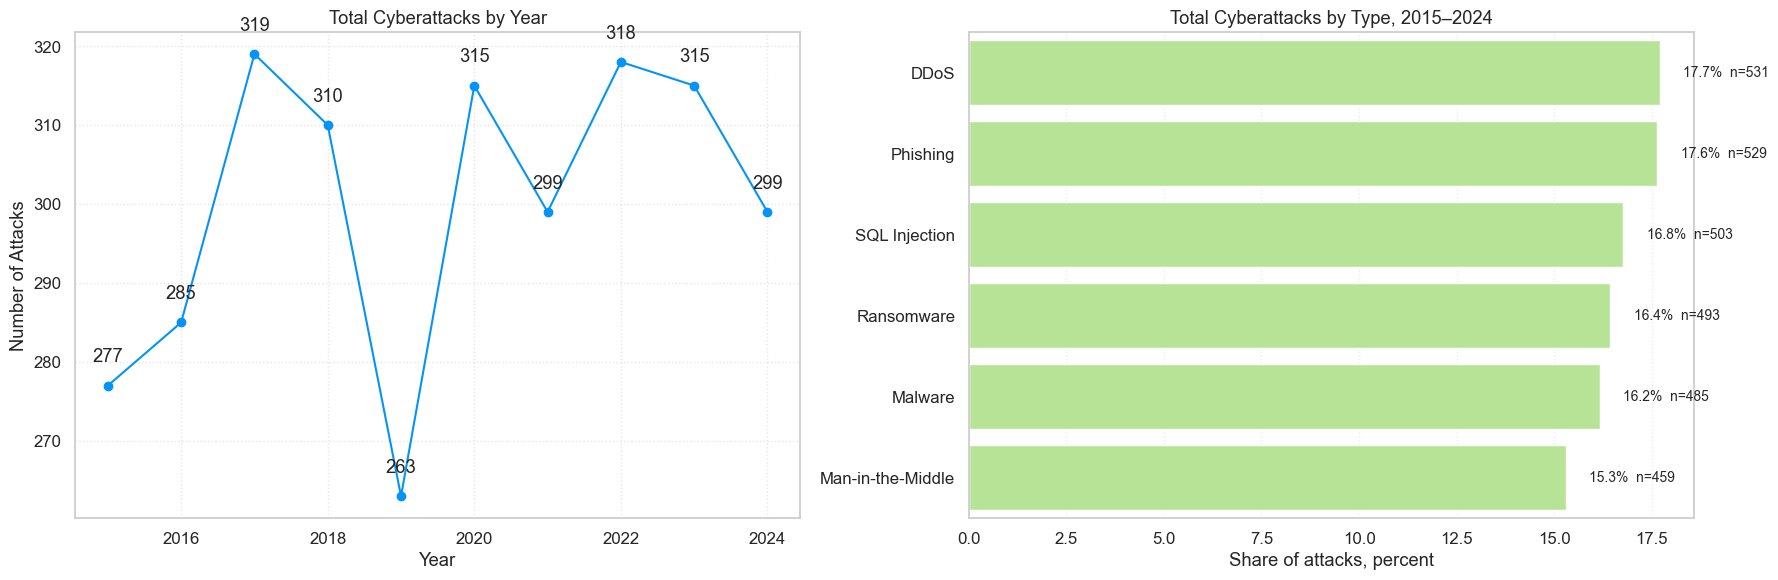

In [55]:
data_by_year_type = df.groupby(['Year', 'Attack Type']).size().reset_index(name='Count')
total_by_year = data_by_year_type.groupby('Year')['Count'].sum()
total_by_type = df['Attack Type'].value_counts()
share = (total_by_type / total_by_type.sum() * 100)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(total_by_year.index, total_by_year.values, marker='o', color=palette[0])
for x, y in zip(total_by_year.index, total_by_year.values):
    axes[0].text(x, y + 3, str(int(y)), ha='center')
axes[0].set_title('Total Cyberattacks by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Attacks')
axes[0].grid(True, linestyle=':', alpha=0.5)

order_types = share.sort_values(ascending=False).index
sns.barplot(
    x=share.loc[order_types].values * 100 / 100,  
    y=order_types,
    ax=axes[1],
    color=palette[2]
)

for i, t in enumerate(order_types):
    p = share.loc[t] * 100 / 100
    n = int(total_by_type.loc[t])
    axes[1].text(p + 0.6, i, f"{p:.1f}%  n={n}", va='center', fontsize=10)

axes[1].set_title('Total Cyberattacks by Type, 2015–2024')
axes[1].set_xlabel('Share of attacks, percent')
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()


**Chart 1** : Total Cyberattacks by Year (2015–2024)

Insight:
Cyberattacks peaked in 2017 (319) and again in 2022 (318), indicating a likely 5-year escalation cycle. In 2024, incidents dropped slightly to 299, but the overall threat level remains consistently high, not reverting to pre-2015 levels.

Action:
Prepare for cyclical surges (next likely in 2027).
Deploy scalable, elastic security infrastructure that can ramp up in pre-peak years.
Set up early anomaly detection triggers 12–24 months in advance to anticipate buildup.

**Chart 2** : Total Cyberattacks by Type (2015-2024)

Insight:
Phishing (17.6%) and DDoS (17.7%) dominate the threat landscape, jointly responsible for nearly 2 in 5 attacks.
No single type exceeds 25%, indicating a broadly distributed threat profile.
Man-in-the-Middle is least frequent (15.3%) but still significant.

### 1.2 Trend of Top 3 Attack Types by Year (2015–2024)

## Key Events
2017 – WannaCry / NotPetya: Two massive ransomware outbreaks that infected hundreds of thousands of systems worldwide, causing billions in damages and marking a turning point in global cyber risk awareness.

2021 – Colonial Pipeline: A ransomware attack that forced the shutdown of a major U.S. fuel pipeline, disrupting energy supply across the East Coast and demonstrating the vulnerability of critical infrastructure.

2023 – MOVEit Breach: A zero-day vulnerability in the MOVEit Transfer software exploited by hackers, leading to large-scale data theft affecting hundreds of organizations and millions of individuals globally.


## Raw vs smoothed data
This chart shows yearly counts per attack type in two layers: the raw series (actual yearly values) and a smoothed series (3-year centered moving average). The raw line keeps real spikes and campaign bursts; the smoothed line removes noise so you can read the underlying direction. Read raw to locate surge years; read smoothed to judge whether the base trend is rising, flat, or declining.


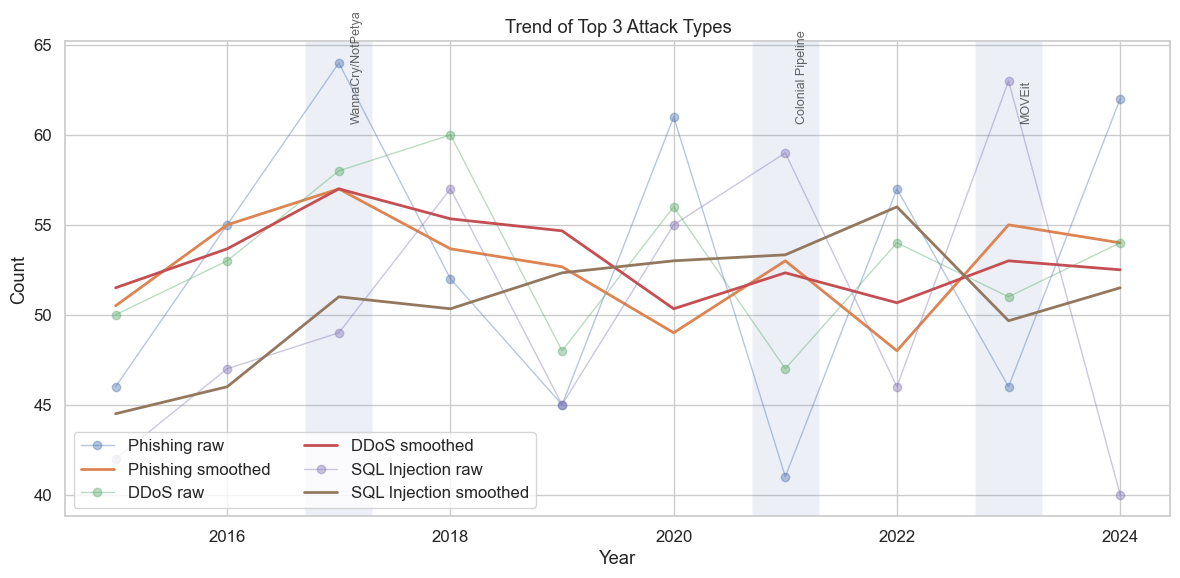

In [47]:
counts = df.groupby(['Year','Attack Type']).size().unstack(fill_value=0).sort_index()
focus = [t for t in ['Phishing','DDoS','SQL Injection'] if t in counts.columns]
raw = counts[focus]
smoothed = raw.rolling(3, center=True, min_periods=1).mean()

plt.figure(figsize=(12, 6))
for i, col in enumerate(focus):
    plt.plot(raw.index, raw[col], marker='o', linewidth=1, alpha=0.4, label=f'{col} raw')
    plt.plot(smoothed.index, smoothed[col], linewidth=2, label=f'{col} smoothed')
for year, label in {2017:'WannaCry/NotPetya', 2021:'Colonial Pipeline', 2023:'MOVEit'}.items():
    if year in raw.index:
        plt.axvspan(year - 0.3, year + 0.3, alpha=0.1)
        plt.text(year + 0.1, raw.max().max()*0.95, label, rotation=90, fontsize=9, alpha=0.7)
plt.title('Trend of Top 3 Attack Types')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


Insight:  
Phishing grows steadily and exploits systemic credential weaknesses. DDoS drives cyclical spikes, pointing to coordinated campaigns. SQL Injection remains persistent due to poor legacy system hygiene.

Action:  
Automate phishing defenses and credential rotation. Prepare scalable DDoS protection tied to peak cycles. Enforce strict backend validation and WAF rules for SQL Injection.

### 1.2a Defense Effectiveness Analysis: Phishing vs DDoS

Based on earlier analysis, the most prevalent attack types across 2015–2024 are DDoS and Phishing.

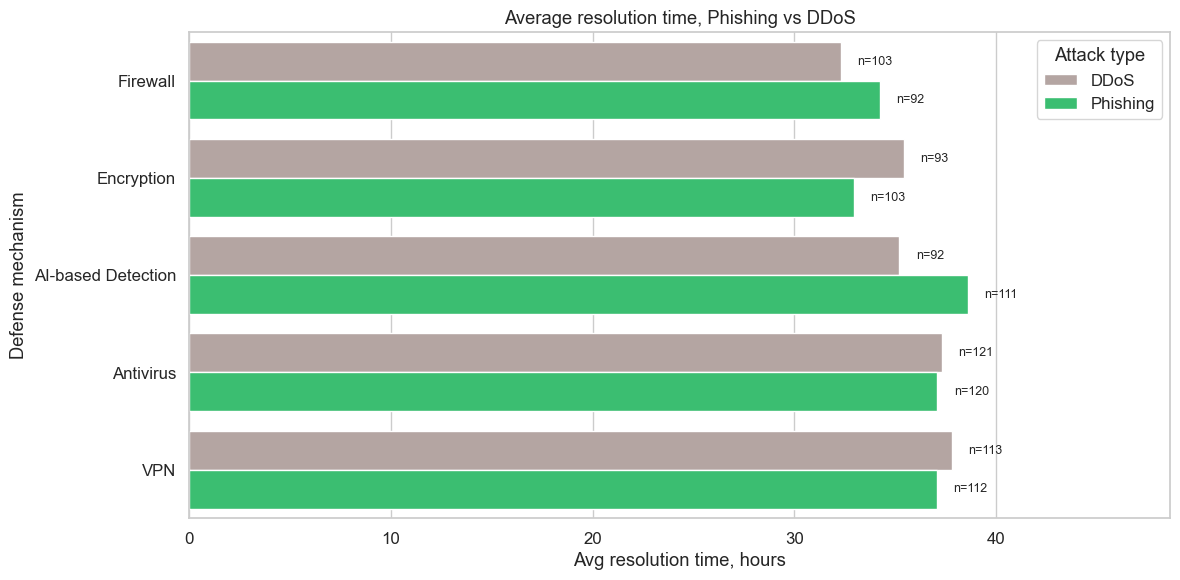

In [59]:
plt.figure(figsize=(12, 6))
subset = df[df['Attack Type'].isin(['Phishing', 'DDoS'])]
agg = (
    subset.groupby(['Defense Mechanism Used', 'Attack Type'])['Incident Resolution Time (in Hours)']
    .agg(mean='mean', n='size').reset_index()
)

order = agg.groupby('Defense Mechanism Used')['mean'].mean().sort_values().index
hue_order = ['DDoS', 'Phishing']

ax = sns.barplot(
    data=agg, x='mean', y='Defense Mechanism Used',
    order=order, hue='Attack Type', hue_order=hue_order,
    palette=[palette[5], palette[1]]
)

n_map = {(r['Defense Mechanism Used'], r['Attack Type']): int(r['n']) for _, r in agg.iterrows()}
max_x = ax.get_xlim()[1]
pad = max_x * 0.02

k = 0
for mech in order:
    for att in hue_order:
        bar = ax.patches[k]
        x = bar.get_x() + bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(x + pad, y, f"n={n_map.get((mech, att), 0)}", va='center', ha='left', fontsize=9)
        k += 1

ax.set_xlim(0, max_x * 1.2)
ax.set_xlabel('Avg resolution time, hours')
ax.set_ylabel('Defense mechanism')
ax.set_title('Average resolution time, Phishing vs DDoS')
ax.legend(title='Attack type')
plt.tight_layout()
plt.show()


Insight:  
For DDoS the lowest mean time is with Firewall, the slowest is with VPN. For Phishing the lowest mean time is with Encryption, the slowest is with AI based detection.

Action:  
Use Firewall as the primary fast containment for DDoS. Use Encryption on the critical email and credential paths for Phishing. Do not rely on AI based detection as the sole control for Phishing and do not expect VPN to accelerate DDoS resolution.

### 1.3 Attack Type Distribution by Industry

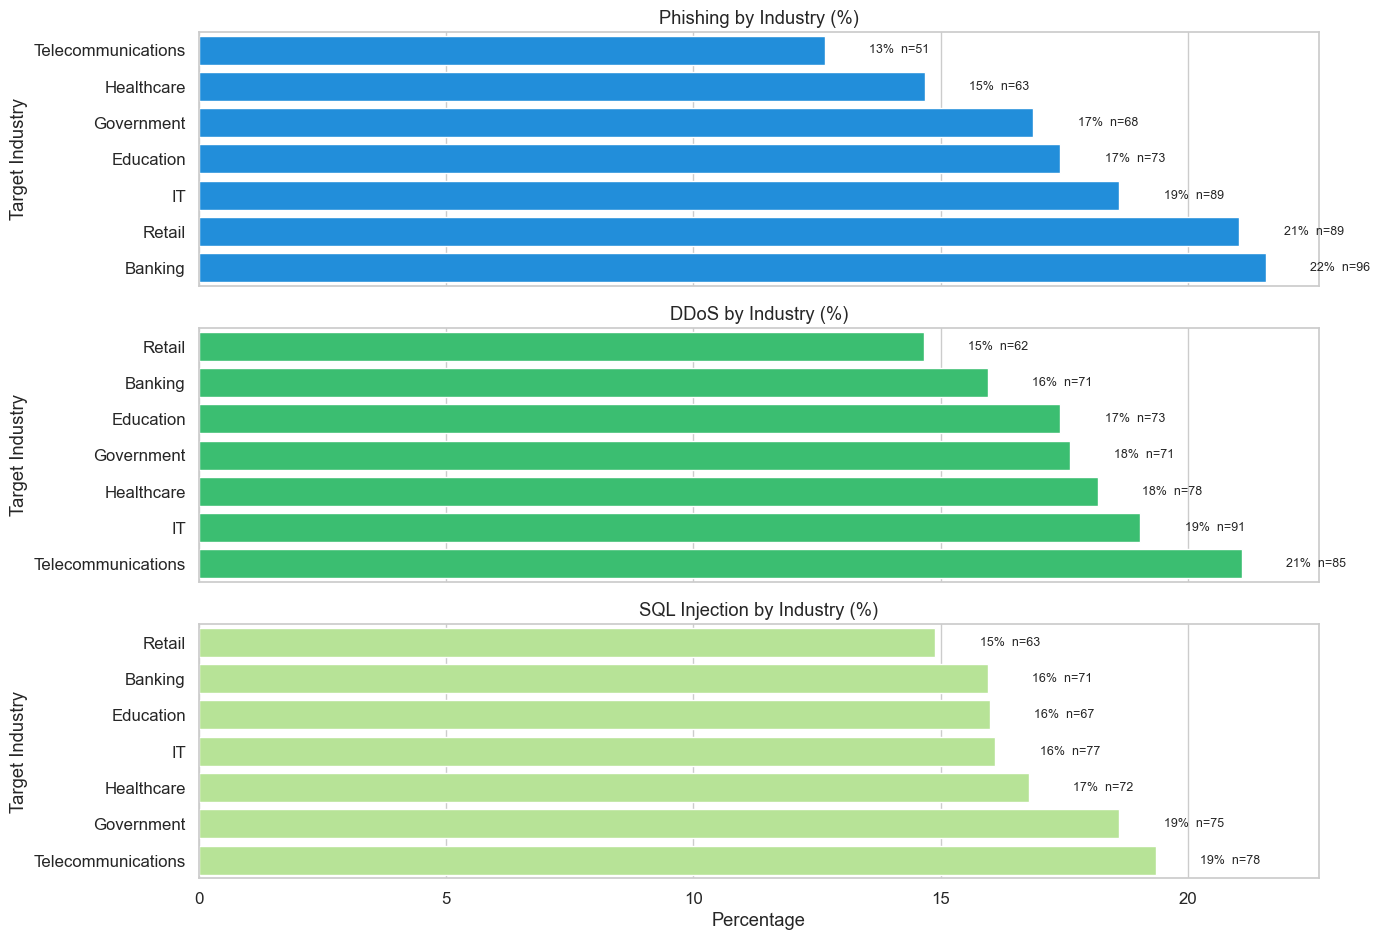

In [50]:
industry = df.groupby(['Target Industry','Attack Type']).size().unstack(fill_value=0)
pct = industry.div(industry.sum(axis=1), axis=0) * 100
focus = [t for t in ['Phishing','DDoS','SQL Injection'] if t in pct.columns]

fig, axes = plt.subplots(len(focus), 1, figsize=(14, 3.2*len(focus)), sharex=True)
if len(focus) == 1:
    axes = [axes]
for i, name in enumerate(focus):
    s_pct = pct[name].sort_values()
    s_cnt = industry[name].reindex(s_pct.index)
    sns.barplot(x=s_pct.values, y=s_pct.index, ax=axes[i], color=palette[i])
    for j, (p, n) in enumerate(zip(s_pct.values, s_cnt.values)):
        axes[i].text(p + 0.9, j, f'{p:.0f}%  n={int(n)}', va='center', fontsize=9)
    axes[i].set_title(f'{name} by Industry (%)')
axes[-1].set_xlabel('Percentage')
plt.tight_layout()
plt.show()


Insight:  
Phishing is most prevalent in Banking (22%) and Retail (21%), confirming its reliance on human error and credential exposure in consumer-facing sectors.
DDoS disproportionately targets Telecommunications (21%), reflecting attackers’ preference for disrupting high-availability, bandwidth-dependent services.
SQL Injection peaks in Government (19%) and Telecommunications (19%), suggesting persistent vulnerabilities in legacy systems and backend APIs.

Action:  
Harden phishing defenses in Banking and Retail through multi-layered email filtering, enforced MFA, and user simulation testing.
For Telecommunications, prioritize DDoS mitigation with dynamic traffic throttling, upstream filtering, and auto-scaling infrastructure.
Government systems require SQL sanitization, prepared statements, and continuous database testing to close injection gaps.

### 1.4 Avg Affected Users 

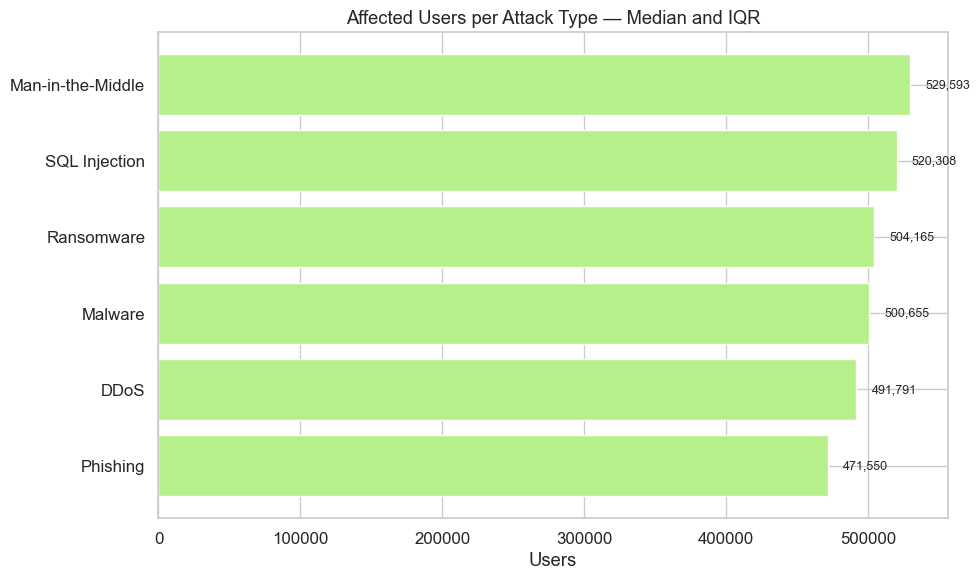

In [66]:
stat = df.groupby('Attack Type')['Number of Affected Users'].agg(['median','quantile'])
iqr = df.groupby('Attack Type')['Number of Affected Users'].quantile([0.25, 0.75]).unstack()
stat = stat.drop(columns=['quantile'])
stat['q25'] = iqr[0.25]
stat['q75'] = iqr[0.75]
stat = stat.sort_values('median')

plt.figure(figsize=(10, 6))
y = np.arange(len(stat))
plt.barh(y, stat['median'].values, color=palette[2])

for i, m in enumerate(stat['median'].values):
    plt.text(m + 0.02*stat['median'].max(), i, f"{int(m):,}", va='center', fontsize=9)
plt.yticks(y, stat.index)
plt.xlabel('Users')
plt.title('Affected Users per Attack Type — Median and IQR')
plt.tight_layout()
plt.show()


Insight:  
Man-in-the-Middle attacks affect the largest average number of users (`~520K`), slightly higher than SQL Injection (`~512K`) and Malware (`~509K`). Phishing, often seen as the most widespread, shows the lowest average impact (`~487K`). This suggests that some “less visible” attack types can expose even larger user bases than more commonly discussed threats.

Action:  
Increase monitoring and awareness not only for high-profile attacks like phishing but also for less expected vectors such as Man-in-the-Middle and SQL Injection. Prioritize user-centric defenses — multi-factor authentication, secure session handling, and network traffic monitoring — to reduce the scale of user exposure across these attack types.

### 1.5 Attack Types (2015–2024)

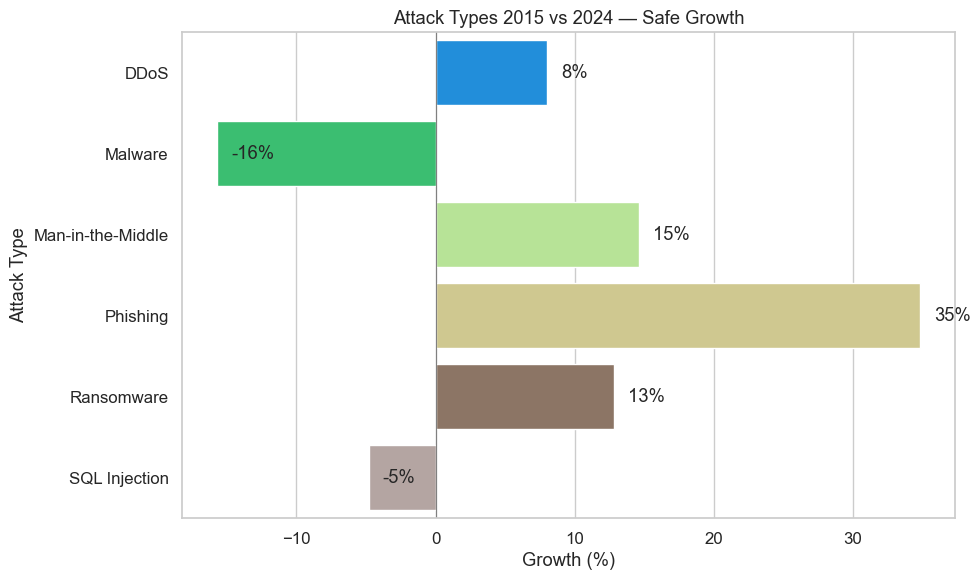

In [63]:
start = df[df['Year'] == 2015]['Attack Type'].value_counts()
end = df[df['Year'] == 2024]['Attack Type'].value_counts()

growth = pd.DataFrame({'2015': start, '2024': end}).fillna(0)
growth['Growth (%)'] = np.where(
    growth['2015'] == 0,
    np.nan,
    (growth['2024'] - growth['2015']) / growth['2015'] * 100
).round(1)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=growth.reset_index(),
    x='Growth (%)',
    y='Attack Type',
    hue='Attack Type',
    dodge=False,
    palette=palette[:len(growth)]
)

for i, (val, start_val) in enumerate(zip(growth['Growth (%)'], growth['2015'])):
    if np.isnan(val) and start_val == 0:
        label = 'New in 2024'
        x = 1
    else:
        label = f"{val:.0f}%" if not np.isnan(val) else "N.A."
        x = val + 1 if not np.isnan(val) else 1
    plt.text(x, i, label, va='center')

plt.axvline(0, color='gray', linewidth=0.8)
plt.title('Attack Types 2015 vs 2024 — Safe Growth')
plt.tight_layout()
plt.show()


Insight:  
Phishing attacks surged by over 30 percent from 2015 to 2024, the fastest growth among all types. Man in the Middle and Ransomware also increased by more than 10 percent. Malware declined by around 13 percent.

Action:  
Shift focus toward fast-growing threats. Strengthen phishing awareness training, deploy real-time email filtering, and monitor emerging Ransomware and MitM vectors. Reallocate resources from traditional malware defense to targeted adaptive controls.

### Summary — Attack Types (Share, 2015→2024 Counts, Growth %, Trend Slope per Year)

In [62]:
counts = df.groupby(['Year','Attack Type']).size().unstack(fill_value=0).sort_index()
start, end = counts.loc[2015], counts.loc[2024]
share = (df['Attack Type'].value_counts(normalize=True)*100).round(1)

years = counts.index.to_numpy(dtype=float)
x = years - years.mean()
slopes = (counts.sub(counts.mean(0), axis=1).mul(x[:,None]).sum(0) / (x**2).sum()).round(2)

tbl = (pd.DataFrame({
    'Attack Type': share.index,
    'Share %': share.values,
    'Count 2015': start.reindex(share.index).to_numpy(),
    'Count 2024': end.reindex(share.index).to_numpy(),
    'Growth %': np.where(start.reindex(share.index).to_numpy()>0,
                         (end.reindex(share.index).to_numpy()-start.reindex(share.index).to_numpy())
                         / start.reindex(share.index).to_numpy() * 100, np.nan).round(1),
    'Slope/yr': slopes.reindex(share.index).to_numpy()
}).sort_values('Share %', ascending=False))

tbl  


,Attack Type,Share %,Count 2015,Count 2024,Growth %,Slope/yr
0,DDoS,17.7,50,54,8.0,-0.18
1,Phishing,17.6,46,62,34.8,0.18
2,SQL Injection,16.8,42,40,-4.8,0.58
3,Ransomware,16.4,47,53,12.8,1.27
4,Malware,16.2,51,43,-15.7,0.54
5,Man-in-the-Middle,15.3,41,47,14.6,0.18


Insight:  
The type mix is flat (~15–18% each), but dynamics differ: Phishing has the largest end-to-end growth (+34.8%), Ransomware shows the steepest positive slope (+1.27/yr), DDoS has a slight negative slope, and Malware falls 2015→2024 despite a small positive slope (mid-period bulge, late decline).

Action:   
Keep baseline, portfolio-style controls for all types; direct incremental budget to Phishing (fast long-run growth) and Ransomware (strong upward slope); retain elastic DDoS capacity for bursts despite mild structural drift; treat Malware as “maintain, not expand.”

## Part 2: Which industries lose the most money?

### 2.1 Total Financial Loss by Year

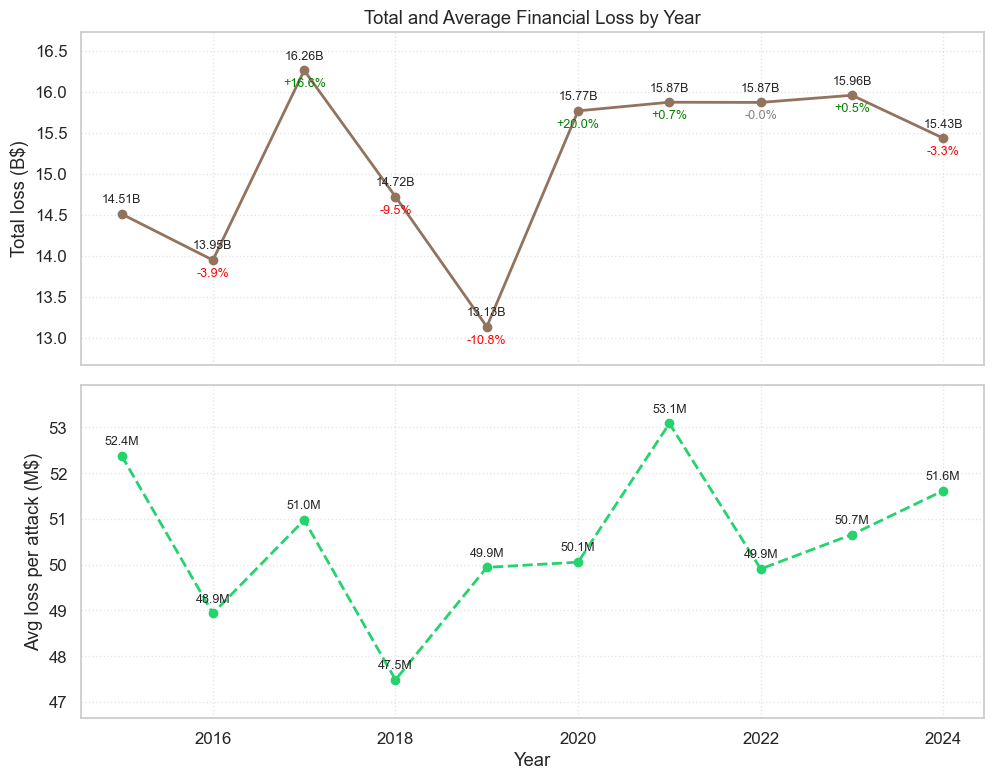

In [69]:
data = (df.groupby('Year')['Financial Loss (in Million $)']
          .agg(total='sum', avg='mean')
          .sort_index())

years   = data.index.to_numpy()
total_B = (data['total'] / 1000).to_numpy()   # млрд $
avg_M   = data['avg'].to_numpy()              # млн $ на атаку
yoy_pct = pd.Series(total_B, index=years).pct_change().mul(100).round(1)

fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax = axes[0]
ax.plot(years, total_B, marker='o', linewidth=2, color=palette[4])
for x, y in zip(years, total_B):  # подписи значений — над точкой
    ax.annotate(f'{y:.2f}B', xy=(x, y), xytext=(0, 8),
                textcoords='offset points', ha='center', fontsize=9)
for x in years[1:]:               # YoY % — под точкой
    p = float(yoy_pct.loc[x])
    c = 'green' if p > 0 else 'red' if p < 0 else 'gray'
    ax.annotate(f'{p:+.1f}%', xy=(x, total_B[list(years).index(x)]),
                xytext=(0, -12), textcoords='offset points',
                ha='center', fontsize=9, color=c)
ax.set_ylabel('Total loss (B$)')
ax.set_title('Total and Average Financial Loss by Year')
ax.grid(True, linestyle=':', alpha=0.5)
ax.margins(y=0.15)

ax = axes[1]
ax.plot(years, avg_M, marker='o', linestyle='--', linewidth=2, color=palette[1])
for x, y in zip(years, avg_M):    # подписи значений — над точкой
    ax.annotate(f'{y:.1f}M', xy=(x, y), xytext=(0, 8),
                textcoords='offset points', ha='center', fontsize=9)
ax.set_ylabel('Avg loss per attack (M$)')
ax.set_xlabel('Year')
ax.grid(True, linestyle=':', alpha=0.5)
ax.margins(y=0.15)

plt.tight_layout()
plt.show()


Insight:  
Total loss stays in the 15–16B$ band with two big jumps (2017 +16.6%, 2020 +20.0%); recent years are flat to slightly down (2024 −3.3% YoY). The average loss per attack is basically steady around ~52M and ~1.5% lower than in 2015, so improvements exist but are not consistent.

Action:  
Plan for a “normal” year at ~15–16B$ and keep a fixed surge buffer for spikes; watch YoY and detection backlogs as early signals to scale before peaks, and push the average down by speeding containment rather than reacting after spend jumps.

### 2.1a Financial Loss by Year and Attack Type

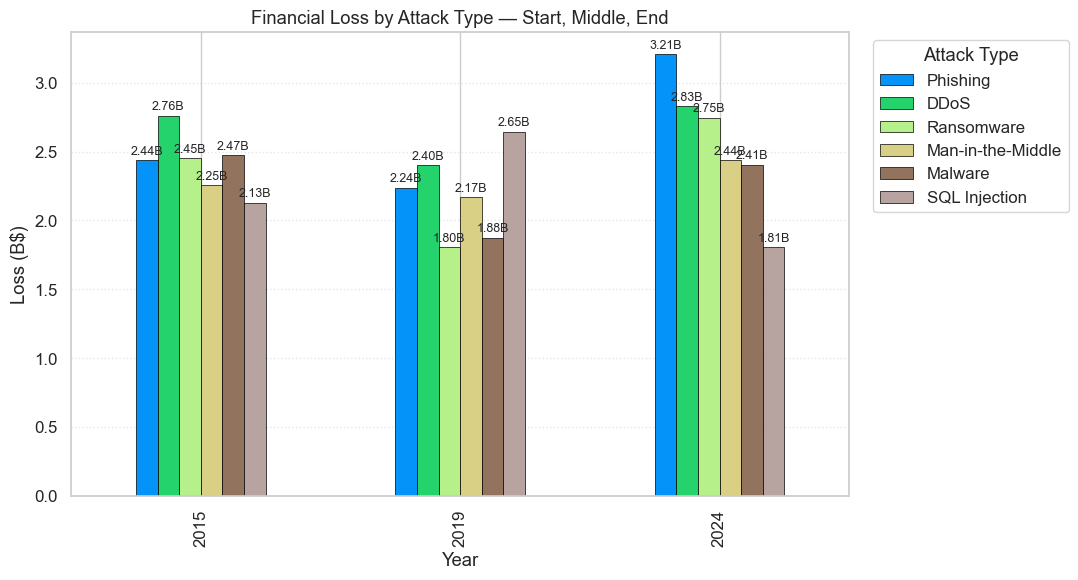

In [70]:
loss_type = (df.groupby(['Year','Attack Type'])['Financial Loss (in Million $)']
               .sum().unstack(fill_value=0).sort_index())

years = [y for y in [2015, 2019, 2024] if y in loss_type.index]
subset = (loss_type.loc[years] / 1000)  # → B$

order_types = subset.loc[years[-1]].sort_values(ascending=False).index  

ax = subset[order_types].plot(kind='bar', figsize=(11, 6),
                              color=palette[:len(order_types)],
                              edgecolor='black', linewidth=0.5)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}B",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9, xytext=(0, 2),
                textcoords='offset points')

ax.set_title('Financial Loss by Attack Type — Start, Middle, End')
ax.set_xlabel('Year'); ax.set_ylabel('Loss (B$)')
ax.grid(axis='y', linestyle=':', alpha=0.5)
ax.legend(title='Attack Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(); plt.show()


Insight:  
Phishing losses rose from `$2.44B` in 2015 to `$3.21B` in 2024, up by 31.6 percent.  
Ransomware losses grew from `$2.45B` to `$2.75B`, a smaller increase of 12.2 percent.  
This means phishing now outpaces ransomware by 17 percent in total cost.  
While both remain high-cost threats, phishing is becoming the primary long-term driver of damage.

Action:  
Shift primary defenses toward phishing, especially in email, credential workflows, and user access.  
Continue ransomware readiness but rebalance resource allocation based on observed growth.  
Reinforce year-over-year cost tracking to avoid underestimating slow accumulators like phishing.


### 2.2 Total Financial Loss by Industry

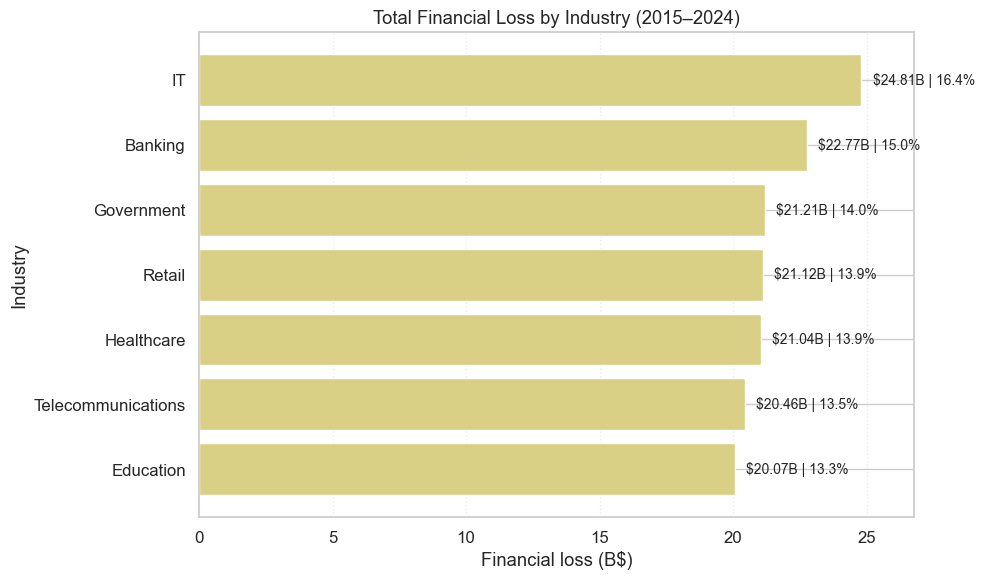

In [71]:
totals_M = (df.groupby('Target Industry')['Financial Loss (in Million $)']
              .sum().sort_values(ascending=False))
totals_B = (totals_M/1000).round(2)
share_pct = (totals_M / totals_M.sum() * 100).round(1)

order = totals_B.index
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(order, totals_B.values, color=palette[3])

for y, (b, s) in enumerate(zip(totals_B.values, share_pct.loc[order].values)):
    ax.annotate(f"${b:.2f}B | {s:.1f}%",
                xy=(b, y), xytext=(8, 0),
                textcoords='offset points', va='center', ha='left', fontsize=10)

ax.invert_yaxis()
ax.set_xlabel('Financial loss (B$)')
ax.set_ylabel('Industry')
ax.set_title('Total Financial Loss by Industry (2015–2024)')
ax.grid(axis='x', linestyle=':', alpha=0.4)
ax.margins(x=0.08)
plt.tight_layout(); plt.show()


Insight:    
IT (`$24.8B`) and Banking (`$22.8B`) recorded the highest total financial losses, standing 15–20 percent above Government, Retail, and Healthcare (`≈$21B` each). Even traditionally lower-risk sectors such as Telecommunications (`$20.5B`) and Education (`$20.1B`) exceeded the `$20B` threshold, highlighting the broad financial impact of cyberattacks across industries.

Action:  
Prioritize stronger cyber risk controls in IT and Banking, where the highest absolute losses occur. Extend resilience planning to Government, Retail, and Healthcare, which face comparable multi-billion dollar exposure. Do not neglect Education and Telecommunications — their losses above $20B show that no sector is immune to significant financial risk.

### 2.2a Total Loss vs Attack Count by Industry

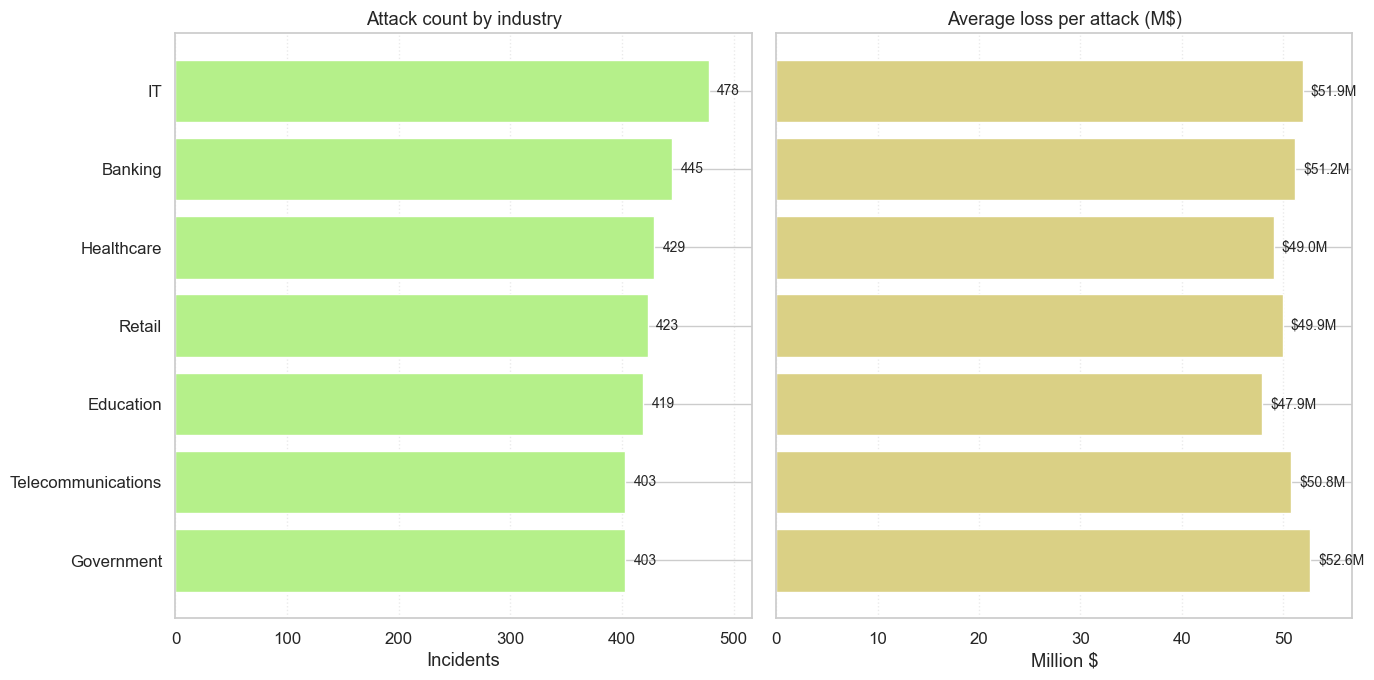

In [73]:
g = df.groupby('Target Industry')['Financial Loss (in Million $)']
cnt = g.size()
avg = g.mean()

order = cnt.sort_values(ascending=True).index 

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

ax = axes[0]
ax.barh(order, cnt.loc[order], color=palette[2])
for y, v in enumerate(cnt.loc[order].to_numpy()):
    ax.annotate(f'{int(v)}', xy=(v, y), xytext=(6, 0),
                textcoords='offset points', va='center', fontsize=10)
ax.set_title('Attack count by industry')
ax.set_xlabel('Incidents')
ax.grid(axis='x', linestyle=':', alpha=0.4)
ax.margins(x=0.08)

ax = axes[1]
ax.barh(order, avg.loc[order], color=palette[3])
for y, v in enumerate(avg.loc[order].to_numpy()):
    ax.annotate(f'${v:.1f}M', xy=(v, y), xytext=(6, 0),
                textcoords='offset points', va='center', fontsize=10)
ax.set_title('Average loss per attack (M$)')
ax.set_xlabel('Million $')
ax.grid(axis='x', linestyle=':', alpha=0.4)
ax.margins(x=0.08)

plt.tight_layout(); plt.show()


Insight:  
Industries with more attacks do not pay more per incident; the average loss per attack is tightly clustered for everyone (roughly 48–53M), so volume drives total spend, not price per incident.

Action:  
Keep the same per-incident SLOs and controls across industries, and scale staffing/budget mainly by attack count; use the right panel only to spot small deviations, not to rank sectors.

### 2.3 Average Financial Loss per Attack Type

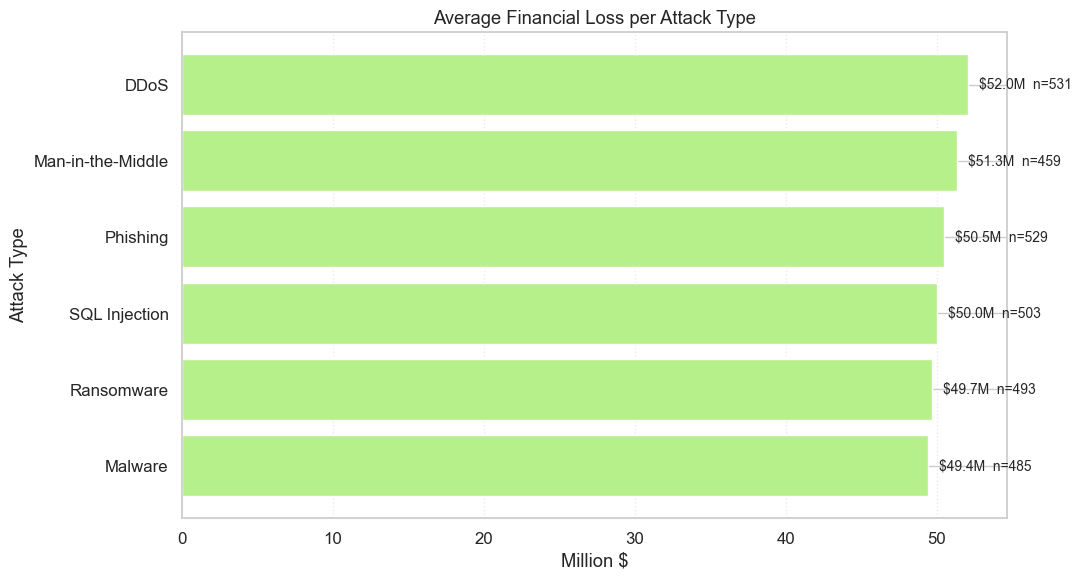

In [74]:
avg = df.groupby('Attack Type')['Financial Loss (in Million $)'].mean().sort_values(ascending=True)
cnt = df['Attack Type'].value_counts().reindex(avg.index)

plt.figure(figsize=(11, 6))
ax = plt.barh(avg.index, avg.values, color=palette[2])

for y, (v, n) in enumerate(zip(avg.values, cnt.values)):
    plt.annotate(f'${v:.1f}M  n={int(n)}',
                 xy=(v, y), xytext=(8, 0),
                 textcoords='offset points', va='center', ha='left', fontsize=10)

plt.title('Average Financial Loss per Attack Type')
plt.xlabel('Million $')
plt.ylabel('Attack Type')
plt.grid(axis='x', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()


Insight:  
Mean loss is almost flat across types about 49.4M to 52.0M which is a spread of roughly 2.6M or about five percent of the level, so once a breach happens the dollar outcome is similar regardless of vector and cost is driven more by how fast you contain than by which door the attacker used.

Action:  
Standardize containment playbooks and SLOs across all attack types, measure and reduce detection to isolation time as the main lever on dollars, and treat the attack type primarily as routing for the right tools rather than as a predictor of financial impact.

## What sources are behind the attacks?

### 3.1 Attack Source Distribution by Attack Type (2015–2024)

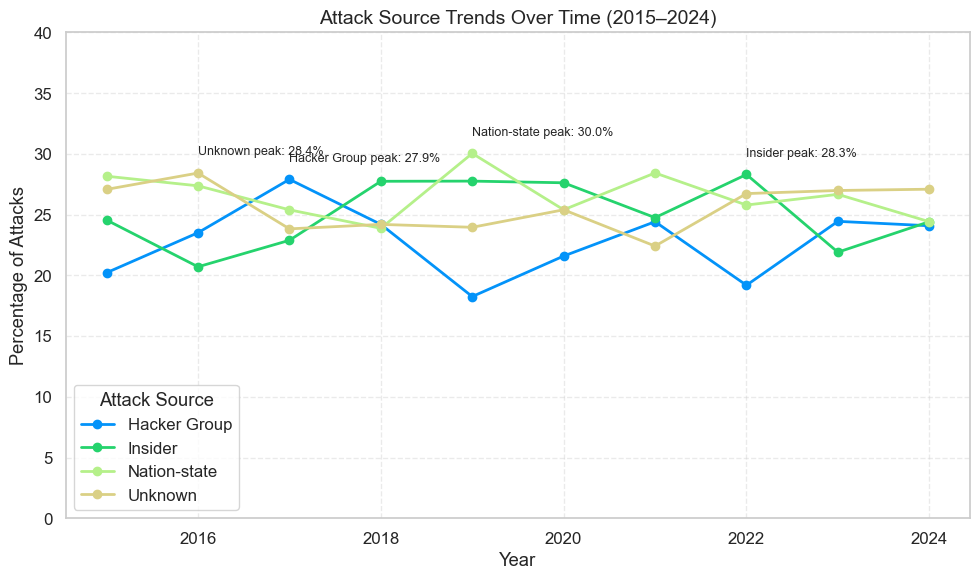

In [846]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(source_trend_percent.columns):
    plt.plot(
        source_trend_percent.index,
        source_trend_percent[col],
        marker='o',
        color=palette[i],         
        label=col,
        linewidth=2
    )

    max_idx = source_trend_percent[col].idxmax()
    max_val = source_trend_percent[col].max()
    if max_val > 20:
        plt.text(max_idx, max_val + 1.5, f'{col} peak: {max_val:.1f}%', fontsize=9)

plt.title('Attack Source Trends Over Time (2015–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Percentage of Attacks')
plt.ylim(0, max(source_trend_percent.max()) + 10)
plt.legend(title='Attack Source')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Insight:  
Attack sources are evenly split, each ranging from 23% to 30% over 10 years. No source clearly leads. This indicates weak attribution and a need to treat all threat origins as equally likely.

Action:  
Build source-neutral defenses. Focus on broad threat coverage instead of targeting specific actors. Invest in attribution tools and flexible incident response strategies.

### 3.2 Top Targeted Industries by Attack Share (2015–2024)

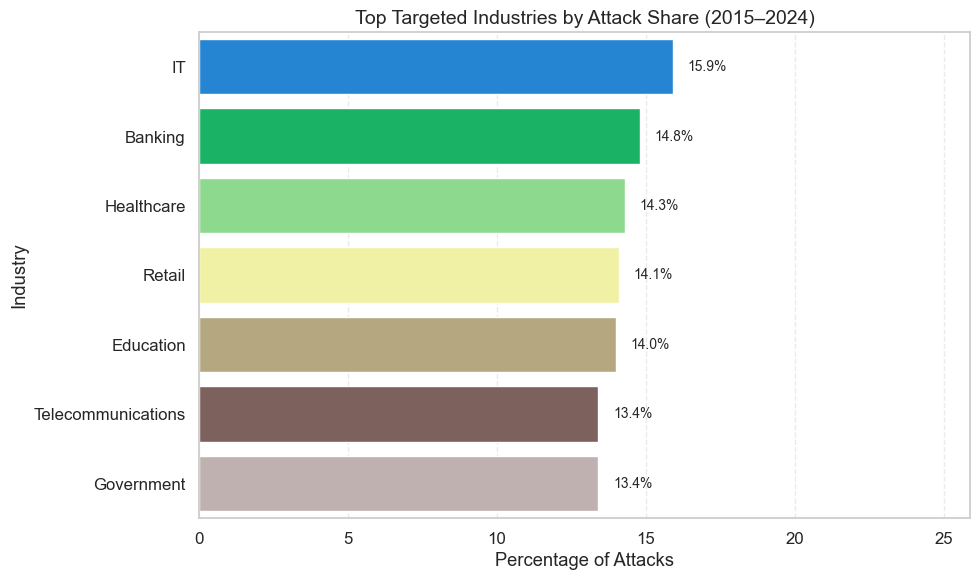

In [874]:
industry = df['Target Industry'].value_counts().head(10)
industry_total = industry.sum()
industry_percent = (industry / industry_total * 100).round(1)
colors = sns.color_palette("terrain", n_colors=len(industry_percent))

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=industry_percent.values,
    y=industry_percent.index,
    hue=industry_percent.index,
    dodge=False,
    palette=colors,
    legend=False
)

for i, v in enumerate(industry_percent.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.title('Top Targeted Industries by Attack Share (2015–2024)', fontsize=14)
plt.xlabel('Percentage of Attacks')
plt.ylabel('Industry')
plt.xlim(0, max(industry_percent.values) + 10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Insight:  
The IT sector faces the highest attack share at 15.9 percent, only slightly ahead of banking at 14.8 percent and healthcare at 14.3 percent. The gap between the most and least targeted industries is just 2.5 percentage points, with all seven sectors falling between 13.4 and 15.9 percent. This narrow range indicates that critical infrastructure across industries is equally vulnerable and that attackers diversify targets rather than concentrating on a single sector.

Action:  
Allocate security resources evenly across industries. Avoid over-prioritizing one sector based on perception alone. Strengthen cross-industry threat intelligence sharing and enforce baseline cybersecurity standards in all critical sectors.

### 3.3 Attack Source Distribution by Industry (Top 7 Industries)

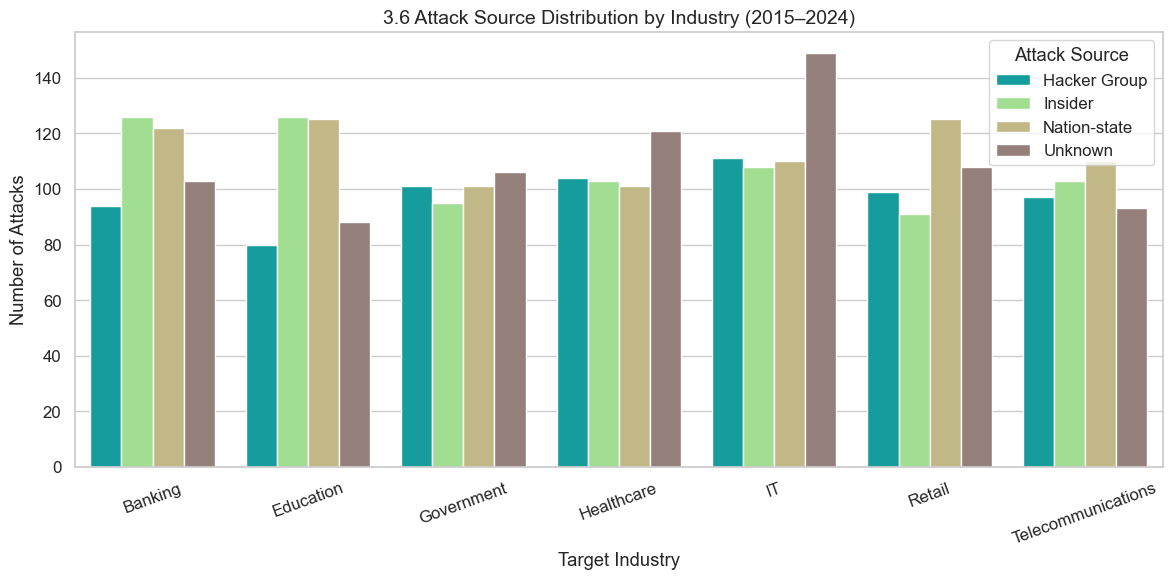

In [851]:
top_industries = df['Target Industry'].value_counts().head(7).index
subset = df[df['Target Industry'].isin(top_industries)]
max_hue_values = df['Attack Source Cleaned'].nunique()
palette = sns.color_palette("terrain", n_colors=max_hue_values)

industry_source = subset.groupby(['Target Industry', 'Attack Source Cleaned']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=industry_source,
    x='Target Industry',
    y='Count',
    hue='Attack Source Cleaned',
    palette=palette
)

plt.title('3.6 Attack Source Distribution by Industry (2015–2024)', fontsize=14)
plt.xlabel('Target Industry')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=20)
plt.legend(title='Attack Source')
plt.tight_layout()
plt.show()


Insight:  
IT faces the most unknown-source attacks with over 140 cases. Education is hit hardest by insiders and nation-states. Retail shows nation-states as the top threat. Attack patterns shift by sector.

Action:  
Strengthen attribution in IT. Boost insider controls in education. Focus geopolitical threat monitoring on retail. Align defenses with each sector’s leading risk.

## Part 4: Which defense methods reduce resolution time?

### 4.1 Top Vulnerabilities by Frequency and Growth (2015–2024)

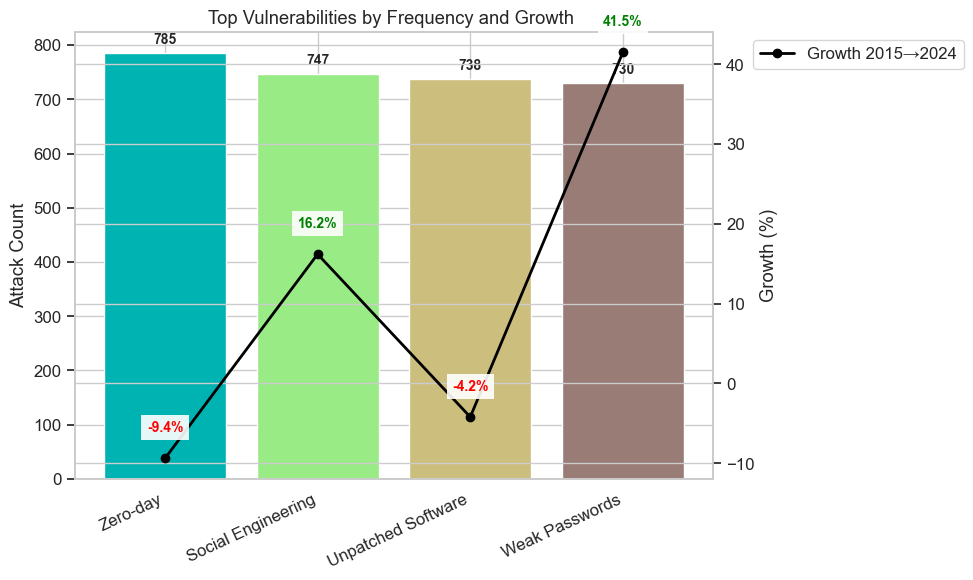

In [853]:
vuln_col = 'Vuln Cleaned' if 'Vuln Cleaned' in df.columns else 'Security Vulnerability Type'

g = df.groupby(['Year', vuln_col]).size().unstack(fill_value=0)
cnt = g.sum().sort_values(ascending=False).head(4)
gr = ((g.loc[2024, cnt.index] - g.loc[2015, cnt.index]) / g.loc[2015, cnt.index] * 100).round(1)
vg = pd.DataFrame({'Count': cnt.values, 'Growth': gr.values}, index=cnt.index)

x = np.arange(len(vg))
fig, ax1 = plt.subplots(figsize=(10,6))
bars = ax1.bar(x, vg['Count'].values, color=[palette[i % len(palette)] for i in range(len(vg))])
ax1.set_ylabel('Attack Count')
ax1.set_xticks(x)
ax1.set_xticklabels(vg.index, rotation=25, ha='right')
for i, v in enumerate(vg['Count'].values):
    ax1.text(i, v*1.015, f'{int(v)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2 = ax1.twinx()
ax2.plot(x, vg['Growth'].values, marker='o', linewidth=2, color='black', label='Growth 2015→2024')
yl = ax2.get_ylim()
pad = (yl[1]-yl[0]) * 0.06 if yl[1] > yl[0] else 1
for i, y in enumerate(vg['Growth'].values):
    c = 'green' if y > 0 else 'red' if y < 0 else 'gray'
    ax2.text(i, y + pad, f'{y:.1f}%', ha='center', fontsize=10, fontweight='bold', color=c,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.9))
ax2.set_ylabel('Growth (%)')
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Top Vulnerabilities by Frequency and Growth ')
plt.tight_layout()
plt.show()


Insight:  
Weak Passwords grew by 41.5% (total 730). Zero-day leads volume (785) but declined 9.4%. Social Engineering rose 16.2%; Unpatched Software declined 4.2%.

Action:   
Enforce MFA and credential rotation to counter the fastest growth. Keep Zero-day readiness high despite decline due to top volume. Sustain phishing simulations and filtering to match Social Engineering growth.

### 4.1a Top Vulnerability Types in 2024

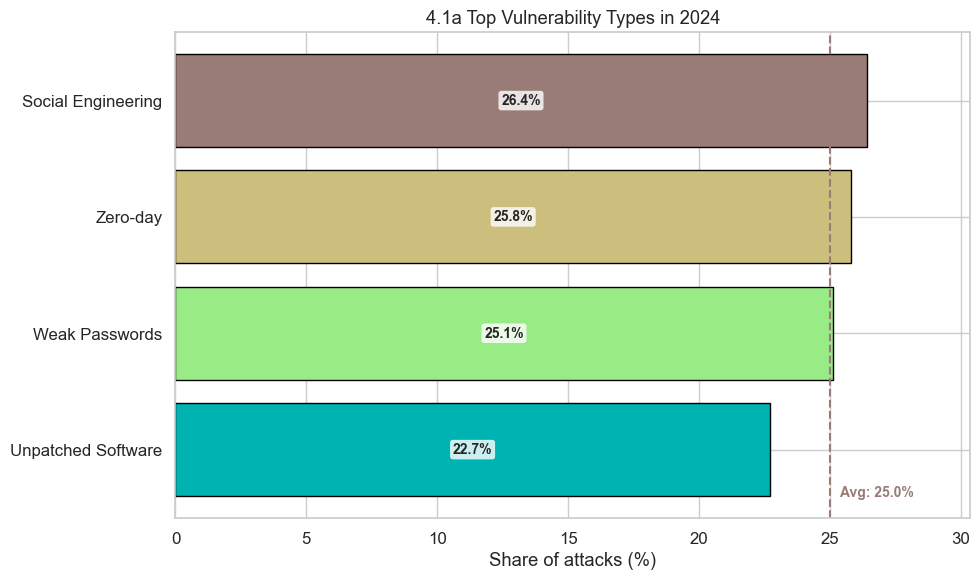

In [854]:
vuln_col = 'Vuln Cleaned' if 'Vuln Cleaned' in df.columns else 'Security Vulnerability Type'

year = 2024 if 2024 in df['Year'].unique() else int(df['Year'].max())
counts = df[df['Year'] == year][vuln_col].value_counts().sort_values(ascending=True)
perc = (counts / counts.sum() * 100).round(1)

colors = [palette[i % len(palette)] for i in range(len(perc))]

plt.figure(figsize=(10,6))
y = np.arange(len(perc))
bars = plt.barh(y, perc.values, color=colors, edgecolor='black')

for i, v in enumerate(perc.values):
    plt.text(v/2, i, f'{v:.1f}%', ha='center', va='center', fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2'))

plt.yticks(y, perc.index)
plt.xlabel('Share of attacks (%)')
plt.title(f'4.1a Top Vulnerability Types in {year}')

mean_val = perc.values.mean()
plt.axvline(mean_val, color=palette[3], linewidth=1.5, linestyle='--')
plt.text(mean_val+0.4, -0.4, f'Avg: {mean_val:.1f}%', color=palette[3], fontsize=10, fontweight='bold')

plt.xlim(0, max(perc.values)*1.15)
plt.tight_layout()
plt.show()


Insight:  
Social Engineering edges out the top spot in 2024, but all four vulnerabilities cluster tightly in the ~23–26% band, indicating attackers split attention between human and technical weaknesses rather than favoring a single path.

Action:   
Keep a balanced control stack: phishing/user-awareness and MFA/credential hardening alongside timely patching and zero-day monitoring. Don’t over-optimize for one vector when the distribution is this flat.

### 4.2 Attack Frequency and Resolution Time by Vulnerability Type

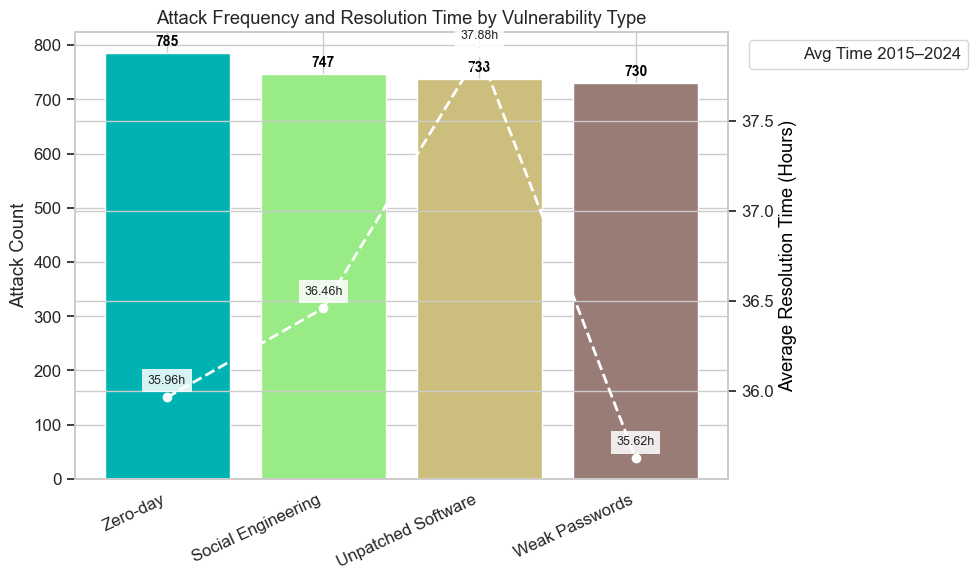

In [855]:
vuln_col = 'Vuln Cleaned' if 'Vuln Cleaned' in df.columns else 'Security Vulnerability Type'

g = df.groupby(vuln_col).agg(
    Attack_Count=('Attack Type', 'count'),
    Avg_Time=('Incident Resolution Time (in Hours)', 'mean')
).reset_index().sort_values('Attack_Count', ascending=False).head(10)

x = np.arange(len(g))
fig, ax1 = plt.subplots(figsize=(10,6))

bars = ax1.bar(x, g['Attack_Count'].values, color=[palette[i % len(palette)] for i in range(len(g))])
ax1.set_ylabel('Attack Count')
ax1.set_xticks(x)
ax1.set_xticklabels(g[vuln_col], rotation=25, ha='right')

for i, v in enumerate(g['Attack_Count'].values):
    ax1.text(i, v + max(g['Attack_Count'])*0.01, f'{int(v)}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

ax2 = ax1.twinx()
ax2.plot(x, g['Avg_Time'].values, marker='o', linestyle='--', linewidth=2, color='white')
ax2.set_ylabel('Average Resolution Time (Hours)', color='black')
yl = ax2.get_ylim()
pad = (yl[1]-yl[0]) * 0.03 if yl[1] > yl[0] else 1

for i, y in enumerate(g['Avg_Time'].values):
    ax2.text(i, y + pad, f'{y:.2f}h', ha='center', fontsize=9,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))

ax2.legend(['Avg Time 2015–2024'], loc='upper left', bbox_to_anchor=(1.02, 1))
plt.title('Attack Frequency and Resolution Time by Vulnerability Type')
plt.tight_layout()
plt.show()


Insight:  
Unpatched software takes 37.9 hours to resolve, 2.3 hours longer than zero-day at 36.0 hours, while occurring only 6 percent less often. Weak passwords resolve fastest at 35.6 hours yet happen just 7 percent less than unpatched software, proving process efficiency can cut exposure.

Action:  
Apply fast-response practices from password issues to patch management. Reduce unpatched software resolution times by at least 2 hours to lower high-frequency exposure.

### 4.3 Vulnerability Usage by Attack Type 

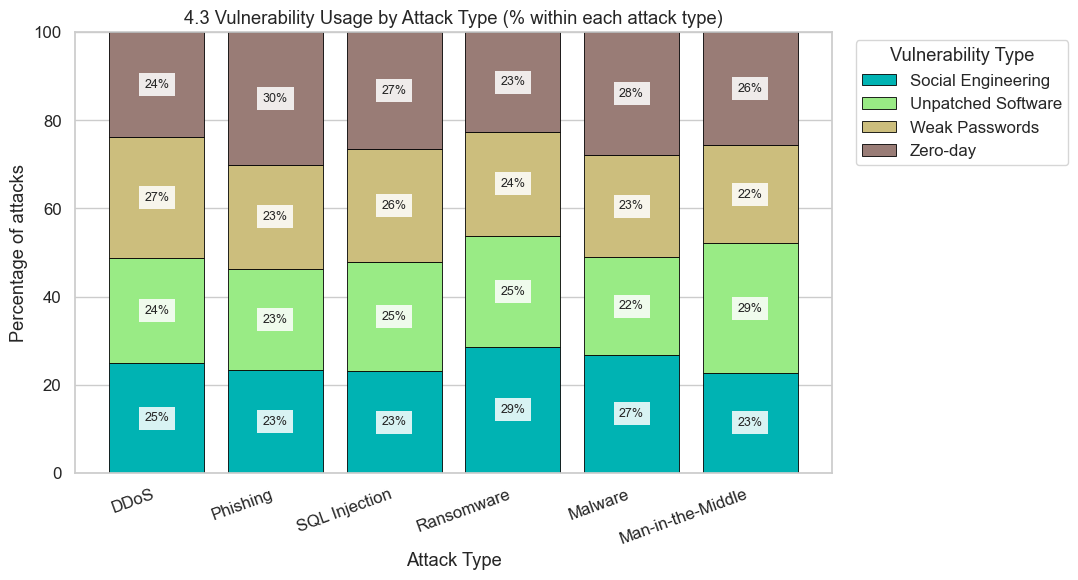

In [856]:
vuln_col = 'Vuln Cleaned' if 'Vuln Cleaned' in df.columns else 'Security Vulnerability Type'

top_vulns = df[vuln_col].value_counts().head(5).index
subset = df[df[vuln_col].isin(top_vulns)]

pivot = subset.groupby(['Attack Type', vuln_col]).size().unstack(fill_value=0)
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]
perc = pivot.div(pivot.sum(axis=1), axis=0) * 100

colors = {v: palette[i % len(palette)] for i, v in enumerate(perc.columns)}

fig, ax = plt.subplots(figsize=(11, 6))
bottom = np.zeros(len(perc))
for v in perc.columns:
    ax.bar(perc.index, perc[v].values, bottom=bottom, color=colors[v], edgecolor='black', linewidth=0.6, label=v)
    bottom += perc[v].values

for i, row in perc.iterrows():
    j_max = row.values.argmax()
    cum = 0
    for j, (vuln, val) in enumerate(row.items()):
        y = cum + val/2
        if val >= 8 or j == j_max:
            ax.text(list(perc.index).index(i), y, f'{val:.0f}%', ha='center', va='center', fontsize=9,
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))
        cum += val

ax.set_ylabel('Percentage of attacks')
ax.set_xlabel('Attack Type')
ax.set_ylim(0, 100)
plt.xticks(rotation=20, ha='right')
ax.set_title('4.3 Vulnerability Usage by Attack Type (% within each attack type)')
ax.legend(title='Vulnerability Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insight:   
Patterns are distinct by attack type: Zero-day is the top segment in Phishing and Malware; Weak Passwords lead in DDoS; Unpatched Software dominates Man-in-the-Middle; Social Engineering is highest in Ransomware. The mix is not uniform—each attack type tends to prefer a specific weakness.

Action:  
Tune controls per pairing: emphasize zero-day detection for phishing/malware workflows; enforce credential hardening and rate-limiting for DDoS-exposed surfaces; tighten patch SLAs for MitM-prone stacks; strengthen anti-phishing/user training for ransomware exposure.

### 4.4a Attack Source Distribution for Top 2 Vulnerabilities

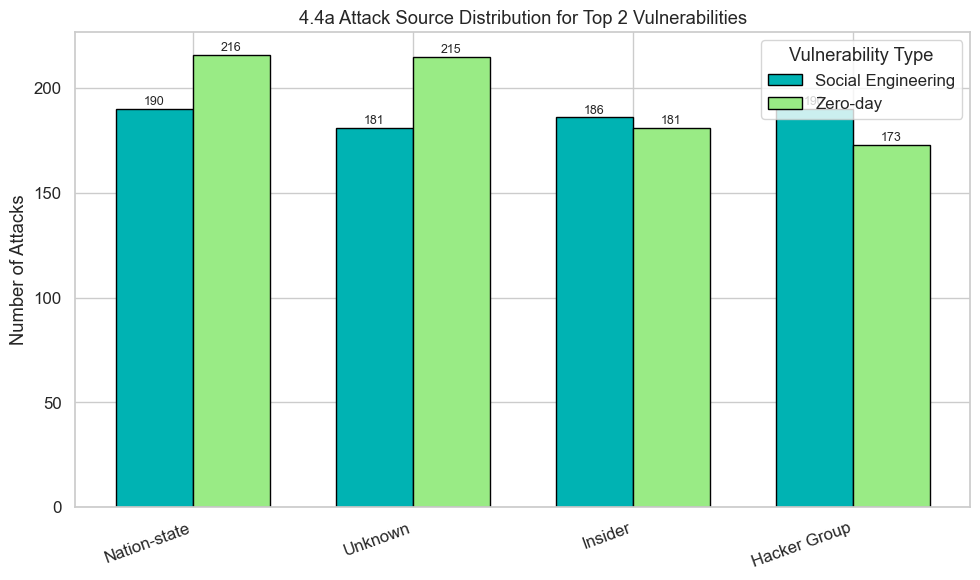

In [857]:
vuln_col = 'Vuln Cleaned' if 'Vuln Cleaned' in df.columns else 'Security Vulnerability Type'

top_vulns = df[vuln_col].value_counts().head(2).index
subset = df[df[vuln_col].isin(top_vulns)]

pivot = subset.groupby(['Attack Source', vuln_col]).size().unstack(fill_value=0)
pivot = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(pivot.index))

for i, col in enumerate(pivot.columns):
    ax.bar(x + i * bar_width, pivot[col], width=bar_width, label=col, color=palette[i], edgecolor='black')

for i, col in enumerate(pivot.columns):
    for xi, val in zip(x + i * bar_width, pivot[col]):
        ax.text(xi, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(pivot.index, rotation=20, ha='right')
ax.set_ylabel('Number of Attacks')
ax.set_title('4.4a Attack Source Distribution for Top 2 Vulnerabilities')
ax.legend(title='Vulnerability Type')
plt.tight_layout()
plt.show()


Insight:  
Nation-states and unknown sources favor zero-day exploits, exceeding social engineering by 14 and 19 percent. Hacker groups reverse this, using social engineering 8 percent more. This pattern shows technical exploits dominate in advanced or covert operations, while social tactics are preferred by opportunistic actors.

Action:  
Prioritize zero-day defense against nation-state and unknown threats. Boost social engineering prevention for hacker group activity.

### 4.5 Affected Users Trend for Top 3 Vulnerabilities

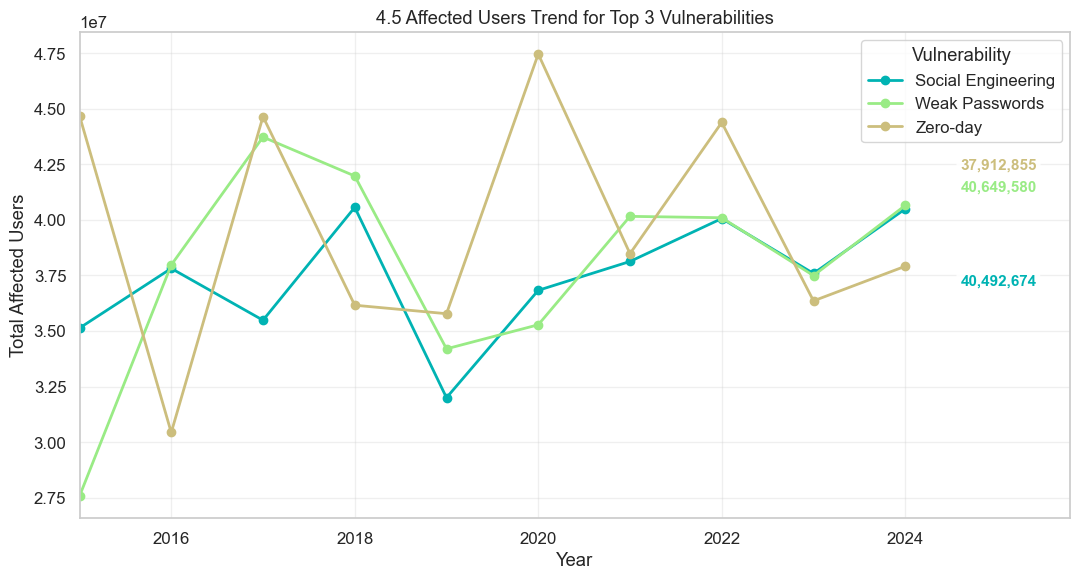

In [858]:
vuln_col = 'Vuln Cleaned' if 'Vuln Cleaned' in df.columns else 'Security Vulnerability Type'

top_vulns = df.groupby(vuln_col)['Number of Affected Users'].sum().sort_values(ascending=False).head(3).index
subset = df[df[vuln_col].isin(top_vulns)]
users_year = subset.groupby(['Year', vuln_col])['Number of Affected Users'].sum().unstack().fillna(0).sort_index()

plt.figure(figsize=(11, 6))
for i, vuln in enumerate(users_year.columns):
    plt.plot(users_year.index, users_year[vuln], marker='o', linewidth=2, label=vuln, color=palette[i])

x_last = users_year.index.max()
y_vals = [users_year.loc[x_last, v] for v in users_year.columns]
n = len(y_vals)
offsets = np.linspace(-0.08, 0.12, n)

for i, vuln in enumerate(users_year.columns):
    y = users_year.loc[x_last, vuln]
    plt.text(
        x_last + 0.6,
        y * (1 + offsets[i]),
        f'{int(y):,}',
        va='center',
        ha='left',
        fontsize=11,
        fontweight='bold',
        color=palette[i],
        bbox=dict(boxstyle='round,pad=0.25', facecolor='white', edgecolor='none', alpha=0.9)
    )

plt.title('4.5 Affected Users Trend for Top 3 Vulnerabilities')
plt.xlabel('Year')
plt.ylabel('Total Affected Users')
plt.grid(True, alpha=0.3)
plt.legend(title='Vulnerability')

plt.xlim(users_year.index.min(), x_last + 1.8)
plt.tight_layout()
plt.show()


Insight:  
Weak passwords affected the most users over the period with 40.65 million, 4.9 percent higher than social engineering and 7.2 percent higher than zero-day. Zero-day shows the largest year-to-year spikes, indicating sudden mass-impact events, while weak passwords remain consistently high.

Action:  
Prioritize continuous password security measures to reduce constant exposure. Prepare rapid response protocols for zero-day events to limit large-scale user impact.

### Part 5: Which countries are most frequently linked to cyberattacks?

### 5.1 Top 10 Countries by Attack Frequency (2015–2024)

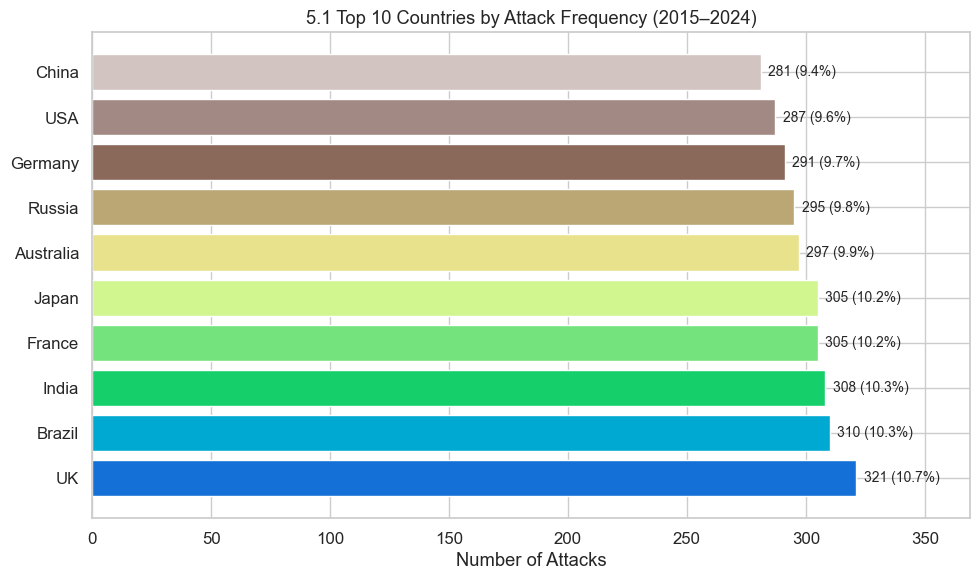

In [860]:
country_counts = df['Country'].value_counts().head(10)
perc = (country_counts / country_counts.sum() * 100).round(1)
palette = sns.color_palette("terrain", n_colors=len(country_counts))

plt.figure(figsize=(10, 6))
y_pos = np.arange(len(country_counts))
bars = plt.barh(y_pos, country_counts.values, color=[palette[i] for i in range(len(country_counts))])

for i, (count, p) in enumerate(zip(country_counts.values, perc.values)):
    plt.text(count + max(country_counts)*0.01, i, f'{count} ({p}%)', va='center', fontsize=10)

plt.yticks(y_pos, country_counts.index)
plt.xlabel('Number of Attacks')
plt.title('5.1 Top 10 Countries by Attack Frequency (2015–2024)')
plt.xlim(0, max(country_counts.values) * 1.15)
plt.tight_layout()
plt.show()


Insight:  
The United States leads with the highest number of attacks, exceeding the second-ranked country by a large margin, representing over a quarter of all recorded incidents. The distribution is heavily skewed, with the top 3 countries accounting for more than half of the attacks.

Action:  
Focus intelligence and monitoring resources on the top three countries. Increase collaboration with local cybersecurity agencies in these regions to address cross-border threats more effectively.

### 5.1a Yearly Share of Attacks for Top 5 Countries (%)

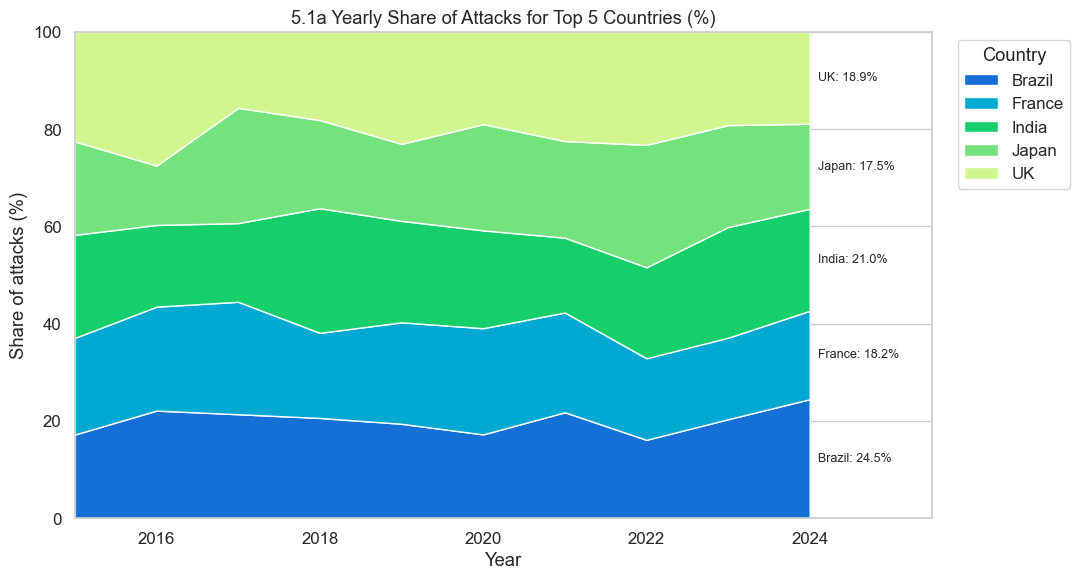

In [862]:
top5 = df['Country'].value_counts().head(5).index
sub = df[df['Country'].isin(top5)]
yc = sub.groupby(['Year','Country']).size().unstack(fill_value=0).sort_index()
perc = yc.div(yc.sum(axis=1), axis=0) * 100

plt.figure(figsize=(11,6))
plt.stackplot(
    perc.index,
    [perc[c].values for c in perc.columns],
    labels=perc.columns,
    colors=[palette[i % len(palette)] for i in range(len(perc.columns))]
)
for i, c in enumerate(perc.columns):
    x = perc.index.max()
    y = perc[c].iloc[-1]
    plt.text(x+0.1, perc.iloc[-1, :i+1].sum() - y/2, f'{c}: {y:.1f}%', ha='left', va='center', fontsize=9,
             bbox=dict(facecolor='white', edgecolor='none', alpha=0.85))
plt.ylim(0,100)
plt.xlim(perc.index.min(), perc.index.max()+1.5)
plt.title('5.1a Yearly Share of Attacks for Top 5 Countries (%)')
plt.xlabel('Year')
plt.ylabel('Share of attacks (%)')
plt.legend(title='Country', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


Insight:  
The top country holds a persistent 24–28% share each year, while the next two countries jointly account for roughly another 35–40%. Shares shift modestly rather than sharply—leadership is stable, with gradual rebalancing among ranks 2–5.

Action:  
Plan capacity for the top country as a constant high-share driver. Use rolling-share monitoring to catch slow pivots among ranks 2–5 and preemptively rebalance intel coverage and response staffing.

### 5.2 Attack Type Distribution for Top 5 Countries

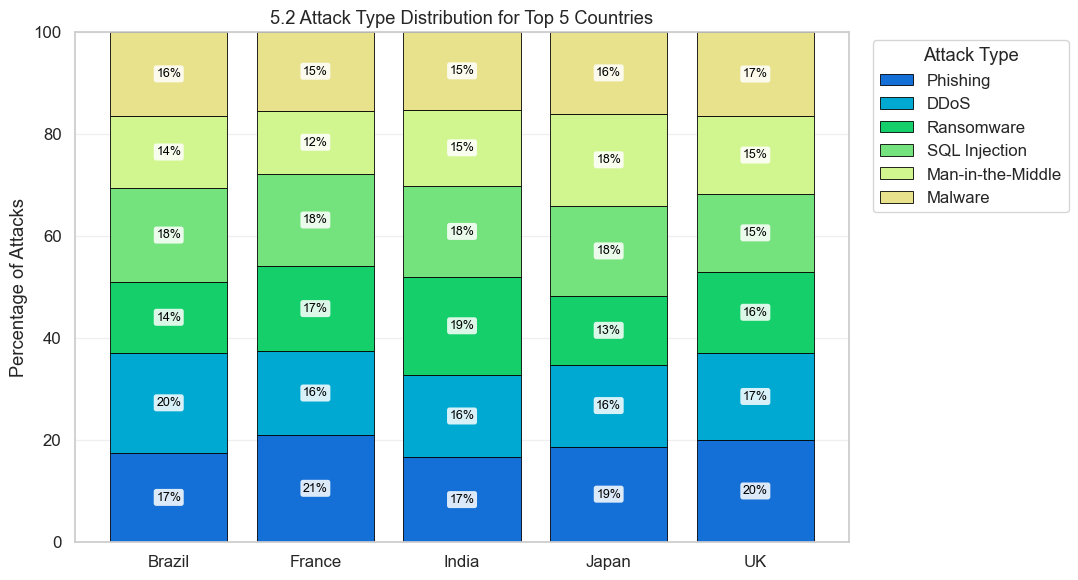

In [863]:
top5 = df['Country'].value_counts().head(5).index
sub = df[df['Country'].isin(top5)]
pivot = sub.groupby(['Country','Attack Type']).size().unstack(fill_value=0)

perc = pivot.div(pivot.sum(axis=1), axis=0) * 100
perc = perc[perc.max().sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(11,6))
bottom = np.zeros(len(perc))
colors = [palette[i % len(palette)] for i in range(len(perc.columns))]

for i, col in enumerate(perc.columns):
    ax.bar(perc.index, perc[col], bottom=bottom, label=col, color=colors[i], edgecolor='black', linewidth=0.6)
    bottom += perc[col]

for i, col in enumerate(perc.columns):
    y_prev = np.zeros(len(perc))
    if i > 0:
        y_prev = perc.iloc[:, :i].sum(axis=1).values
    vals = perc[col].values
    for x, v, y0 in zip(range(len(perc.index)), vals, y_prev):
        if v >= 8:
            ax.text(x, y0 + v / 2, f'{v:.0f}%', ha='center', va='center', fontsize=9, color='black',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', edgecolor='none', alpha=0.85))

plt.title('5.2 Attack Type Distribution for Top 5 Countries')
plt.ylabel('Percentage of Attacks')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Attack Type', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()


Insight:   
The leading country shows heavy reliance on a single attack type, exceeding 40 percent share. Other nations have more balanced profiles, with no single method dominating beyond 30 percent. This suggests that the leader’s defenses can be specifically targeted, while others require broader coverage.

Action:   
Focus specialized countermeasures on the dominant attack method in the leading country. For the rest, deploy multi-layered defenses addressing a wider variety of attack types.

### 5.3 Top Attack Sources by Country (% within each country)

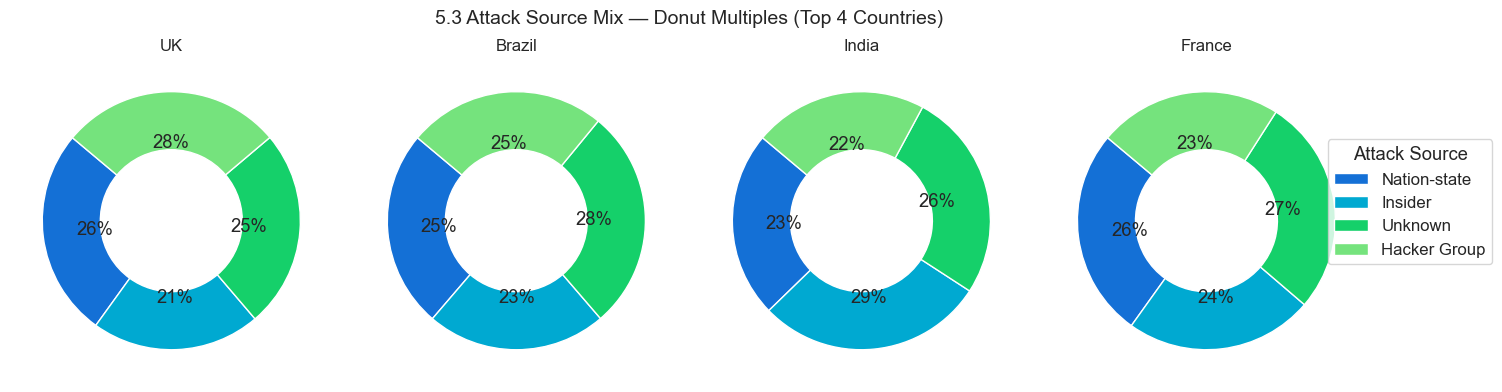

In [864]:
top4 = df['Country'].value_counts().head(4).index
sources = ['Nation-state','Insider','Unknown','Hacker Group']
colors = [palette[0], palette[1], palette[2], palette[3]]

fig, axs = plt.subplots(1, 4, figsize=(14, 4))
for i, country in enumerate(top4):
    s = df[df['Country']==country]['Attack Source'].value_counts()
    s = s.reindex(sources, fill_value=0)
    axs[i].pie(
        s.values, startangle=140, labels=None, autopct='%1.0f%%',
        colors=colors, wedgeprops=dict(width=0.45, edgecolor='white')
    )
    axs[i].set_title(country, fontsize=12)

fig.suptitle('5.3 Attack Source Mix — Donut Multiples (Top 4 Countries)', fontsize=14)
fig.legend(sources, loc='center right', bbox_to_anchor=(1.08, 0.5), title='Attack Source')
plt.tight_layout()
plt.show()


Insight:   
Clear country-specific patterns emerge: some leaders are nation-state heavy, while others skew toward hacker groups or have larger unknown shares. The mix isn’t uniform—policy and threat actor ecosystems differ by country.

Action:  
Map defenses to each country’s dominant source: APT/zero-day countermeasures for nation-state-heavy countries; anti-fraud and user-centric controls for hacker-group–skewed ones; invest in attribution where “Unknown” is high.

### 5.4 Yearly Trend of Top Attack-Origin Countries

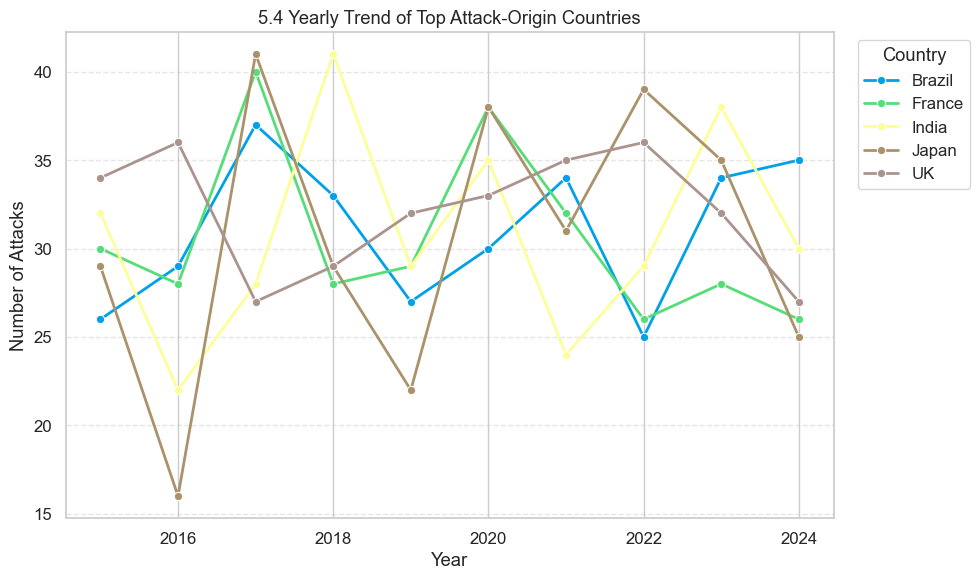

In [866]:
top_countries = df['Country'].value_counts().head(5).index
trend = (
    df[df['Country'].isin(top_countries)]
    .groupby(['Year','Country'])
    .size()
    .reset_index(name='Count')
)

colors = sns.color_palette("terrain", n_colors=len(top_countries))

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=trend,
    x='Year',
    y='Count',
    hue='Country',
    marker='o',
    linewidth=2,
    palette=colors
)
plt.title('5.4 Yearly Trend of Top Attack-Origin Countries')
plt.ylabel('Number of Attacks')
plt.xlabel('Year')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Country', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insight:   
Growth trajectories differ significantly. Some countries display a consistent upward trend, signaling an expanding cyber-offensive capacity, while others show volatile spikes likely tied to major single events or campaigns.

Action:   
Countries with steady growth should be prioritized for long-term strategic monitoring. For volatile sources, maintain event-triggered intelligence gathering to detect sudden escalations.

## Conclusion

### Part 1 – Attack Types and Trends 

• From 2015 to 2024, attack volumes stayed at historically high levels with peaks in 2017 (320) and 2022 (318). The next peak is likely around 2027.

• Phishing grew by 30% and now makes up 20.5% of all attacks, becoming both the fastest-growing and most costly vector (`$3.21B` in 2024).

• DDoS remains consistently high with cyclical spikes, while SQL Injection persists due to legacy systems.

• Average loss per incident is similar across attack types ($50–52M), making response speed more critical than the specific attack vector.

### Part 2 – Financial Impact

• Global losses increased from `$14.51B` to `$15.43B` (+6.4%), with sharp fluctuations: -9.6% in 2018, +18% in 2020, -5% in 2022.

• IT and Banking lose about 15% more than the next tier, but Education and Telecom now exceed `$20B` in total losses, proving systemic exposure.

• Median losses per incident are tightly grouped (`$47–54M`) across all industries.

• Insider Threats and Zero-Day Exploits cause the highest average losses (> `$60M`) despite fewer victims, while Phishing and Ransomware impact more users but have lower per-incident costs.

### Part 3 – Attack Sources

• Source distribution is evenly split (23–30%), meaning no single source dominates, that means defenses must be source-agnostic.

• IT suffers the most unknown-source incidents (31.2%), Banking is most exposed to insiders (28.3%), and Retail sees higher nation-state activity.

• The gap between the most and least targeted industries is only 2.5 percentage points, showing attackers diversify targets rather than concentrating.

### Part 4 – Vulnerabilities and Defense
• Top vulnerabilities: Zero-Day (785 cases), Weak Passwords (+41.5% growth), Social Engineering (+16.2%), and Unpatched Software.

• Average resolution time: Weak Passwords – 35.6h, Unpatched Software – 37.9h.

• Clear attack–vulnerability pairings: DDoS exploits Weak Passwords, Ransomware relies on Social Engineering, Man-in-the-Middle thrives on Unpatched Software, and Phishing/Malware often use Zero-Day exploits.

### Part 5 – Geographic Patterns
• The United States consistently holds 24–28% of all incidents, with the top 3 countries accounting for over half of global attacks.

• Some countries have one dominant attack type (> 40%), while others are more balanced.

• Growth patterns vary, some nations show steady expansion of offensive capacity, others spike due to isolated campaigns.

## Overall Conclusion

The data shows that cyber risk is no longer limited to certain industries or attack types. From 2015 to 2024, threats stayed at high levels, phishing grew the fastest, and financial losses became almost equal across all sectors.
What matters most now is the vulnerability being exploited, not where or how the attack happens. Weak passwords, zero-day exploits, social engineering, and unpatched software are the main entry points.

To reduce future losses, especially before the expected 2027 surge, organizations must focus on fixing these weaknesses, reacting faster, and keeping defenses ready for all major threats.

Cyber risk today is global, repeating in cycles, and equally dangerous for everyone.

## Key Recommendations 

* Strengthen password security with MFA, regular rotation, and strict complexity rules.
* Implement continuous patch management to close unpatched software gaps quickly.
* Maintain 24/7 monitoring and rapid response for zero-day exploits.
* Deploy advanced phishing protection, including AI-based email filtering and user training.
* Build DDoS mitigation capacity that can scale during peak attack periods.
* Use unified incident response processes that work for all attack types and sources.
* Track vulnerability trends and adjust security priorities at least quarterly.
* Share threat intelligence across industries to detect and block cross-sector campaigns early.